# Logistic Regression Example with Scikit-Learn - Revisited

This session we sill review the Logistic Regression example, looking at each step in a bit more detail.

Start by importing the relevant libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scikit_utilities as ut

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Get the Iris Data - Split it and Standardise it

In [2]:
iris = datasets.load_iris()
## We are only interested in the petal length and width features
X=iris.data[:, [2,3]]
y=iris.target

##split the dataset into training and test datasets - 30% will be test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#The combined data sets are for plotting the decision boundaries
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### Perform Logistic regression
Use the SciKit Learn [Logistic Regression classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit the standardised training data ```X_train_std```. Its a supervised model, so it needs the ```y_train``` dataset too so!

In [4]:
lr = LogisticRegression(C=1.0, random_state =0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

And that is it! You have __fitted the Logistic Regression model to the data!__

## Evaluate the Model


#### Predict class memebership probability
We can use the model ```predict_proba``` method to predict the probability of data. Lets take the first 2 X_test_std data row and make a predictions on them:

In [5]:
X_test_std[0:2,:]

array([[ 0.70793846,  1.50872803],
       [ 0.09545238, -0.29145882]])

In [6]:
lr.predict_proba(X_test_std[0:2,:])

array([[ 0.00198445,  0.1816214 ,  0.81639414],
       [ 0.26464616,  0.61627768,  0.11907616]])

This says that the model predicts the first X data row belongs to class 0 (iris- setosa) with a P=2e-11, class 1 (iris-versicolor) with a probability of P=0.06 and class 2 (iris-virginica) with a probability of 0.94. 

#### Predicting the class 
if we use a __One v All__ approach, we compare each prediction for the input data and take the best probability and assign it to that class. So teh first example above is assigned to class 2.

#### Estimating accuracy with a score
We can score how accurate the model is by using the LinearRegression ```score``` method. This is done by supplying the method with the __standardised X test data and the y test__ data sets. This assesses how many of the test data points the model predicted correctly and indicates accuracy.

$$\textsf{fraction of correct predictions:} \frac{\textsf{correct predictions}}{\textsf{total number of data points}} $$

In [7]:
print("The model has an accuracy of %.1f%%" % (lr.score(X_test_std, y_test)*100))

The model has an accuracy of 80.0%


Lets have a closer look at the decison boundaries that the model has chosen:

Populating the interactive namespace from numpy and matplotlib


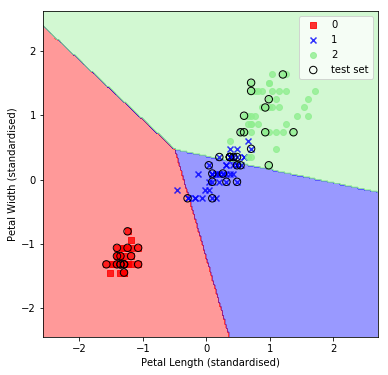

In [8]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 6)

plt = ut.plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx=range(105, 150))
plt.xlabel('Petal Length (standardised)')
plt.ylabel('Petal Width (standardised)')
plt.legend(loc='upper right')
plt.show()

### Improving the Model

#### Regularisation

Overfitting is a common problem in ML, where a model fits a training set very well but fails to generalise to new data. When a model OVERFITS we say it has HIGH VARIANCE. This is often caused by an overly complicated model for the underlying data. Simialrly we can have models that UNDERFIT (these models have HIGH BIAS) which means the model is not complex enough to capture the pattern in the underlying data.

We often seek to get a good BIAS-VARIANCE tradeoff for ML models, tuning the complexity of the models to capture the optimum ammount of underlying pattern. A method often used for this is regularisation. Regularisation is used to handle high correlation between feayuires, filter out noise and prevent overfitting. It introduces extra information or bias to penalise extreme paramter weights. L2 regularisation is often used. It is added as a term to the cost function. It allows control on how well the model fits the training data by keeping the weights small.

Lets fit 10 Logistic Regression models with different Inverse regularisation parameter values C.

In [9]:
weights, params, scores = [], [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10**c, random_state =0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    scores.append(lr.score(X_test_std, y_test)*100)

In [10]:
weights = np.array(weights)

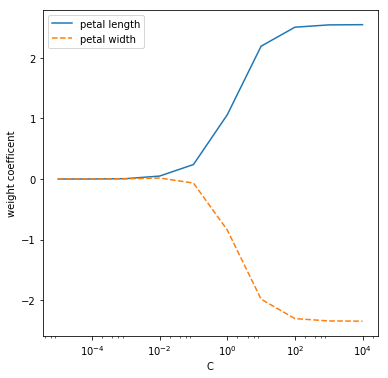

In [11]:
plt.plot(params, weights[:,0],label='petal length')
plt.plot(params, weights[:,1],linestyle='--', label='petal width')
plt.ylabel('weight coefficent')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

Increasing the Regularisation strength (decreasing C) the weight coefficents shrink - the model becomes less complex. Lets see what this does to the accuracy score:

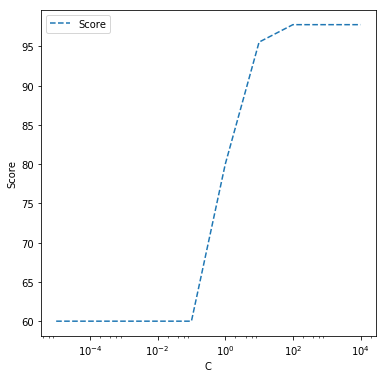

In [12]:
plt.plot(params, scores,linestyle='--', label='Score')
plt.ylabel('Score')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

The accuracy reduces as we decrease C - there is a tradeoff between a model that generalises well Lets examine what effect we have had on the decision boundaries:


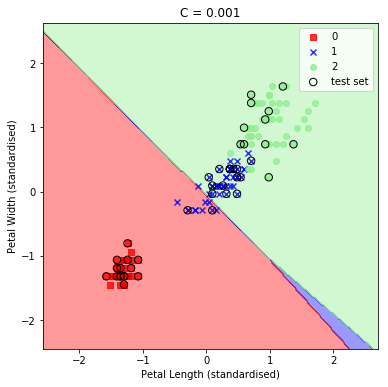

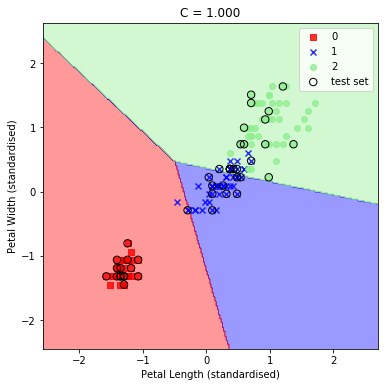

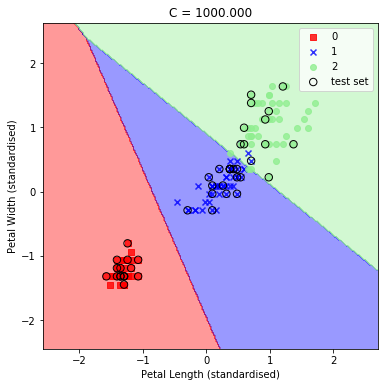

In [13]:
C = [0.001, 1, 1000]
for c in C:  
    lr = LogisticRegression(C=c, random_state =0)
    lr.fit(X_train_std, y_train)
    plt = ut.plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx=range(105, 150))
    plt.xlabel('Petal Length (standardised)')
    plt.ylabel('Petal Width (standardised)')
    plt.legend(loc='upper right')
    plt.title("C = %0.3f" %c)
    plt.show()
    